In [2]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [12]:
automobile_df = pd.read_csv('C:/Users/abhis/Downloads/code/datasets/auto-mpg.csv')

automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [13]:
automobile_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

# converting object type to int for horsepower 


In [14]:
automobile_df = automobile_df.replace('?', np.nan)
automobile_df = automobile_df.dropna()
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors='coerce')
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [15]:
automobile_df.shape

(392, 9)

In [16]:
from sklearn.model_selection import train_test_split

X = automobile_df[['horsepower']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [18]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.6149118546219905


In [20]:
y_pred = linear_model.predict(x_test)
from sklearn.metrics import r2_score

print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.5680532755778093


# here both linear_model score and r2 score is very less so 

In [35]:
X = automobile_df[['displacement', 'horsepower', 'weight']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [36]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.7104839679580808


In [37]:
y_pred = linear_model.predict(x_test)
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.6721551617347311


# now the Test and Train score is better

In [33]:
#Making age coulum for better prediction
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,age
265,17.5,8,318.0,140,4080,13.7,1978,1,dodge magnum xe,43
387,38.0,6,262.0,85,3015,17.0,1982,1,oldsmobile cutlass ciera (diesel),39
283,20.2,6,232.0,90,3265,18.2,1979,1,amc concord dl 6,42
80,22.0,4,122.0,86,2395,16.0,1972,1,ford pinto (sw),49
142,26.0,4,79.0,67,1963,15.5,1974,2,volkswagen dasher,47


In [34]:
#deleting model year, origin, car name which are irrelivent to mpg
automobile_df.drop(['model year','origin','car name'], axis=1, inplace=True)
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130,3504,12.0,51
156,16.0,8,400.0,170,4668,11.5,46
80,22.0,4,122.0,86,2395,16.0,49
92,13.0,8,351.0,158,4363,13.0,48
49,23.0,4,122.0,86,2220,14.0,50


# Now predicting with considering age

In [42]:
X = automobile_df[['displacement', 'horsepower', 'weight','age','cylinders','acceleration']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
print('Training score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.8091750496035446
Testing score:  0.8034832363646159


In [45]:
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

age            -0.738438
cylinders      -0.392040
horsepower     -0.006316
weight         -0.006140
displacement    0.004730
acceleration    0.021712
dtype: float64


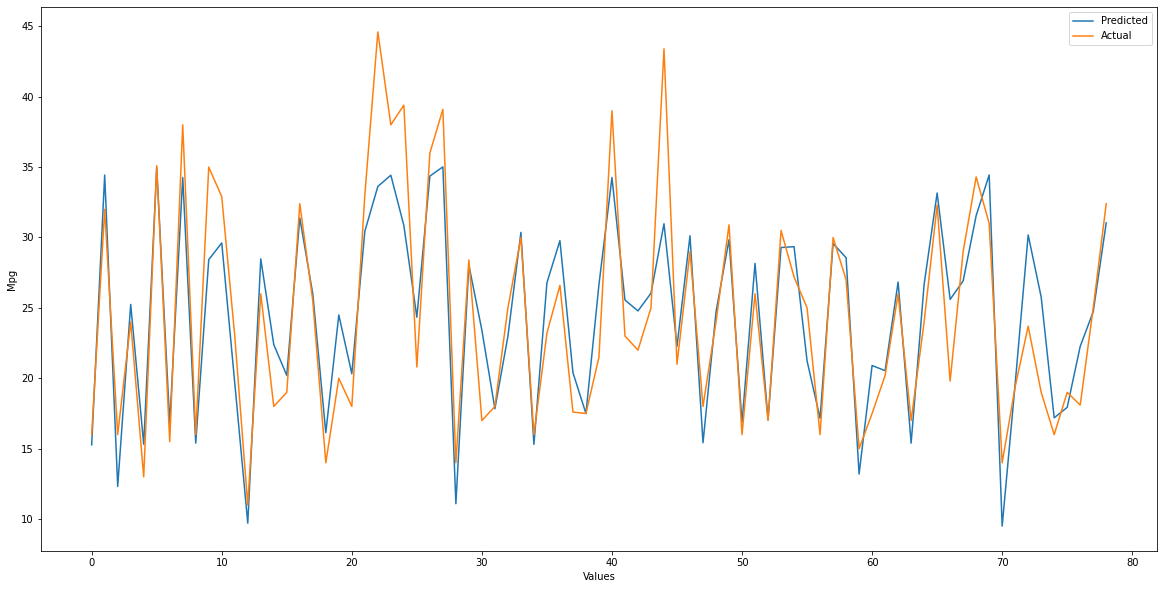

In [47]:
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Mpg')
plt.xlabel('Values')

plt.legend()
plt.show()